In [120]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from collections import Counter

# 1. Reading Data
The original dataset contains about 7 million rows from 2001 to 2017; however, we have selected a dataset from 2012 to 2017 for our analysis containing around 1.4 million rows and 23 features.

In [121]:
data_4 = pd.read_csv(r"Chicago_Crimes_2012_to_2017.csv", index_col='Date')
original_df = pd.read_csv(r"Chicago_Crimes_2012_to_2017.csv")# data without any changes
df = data_4

# 2. Description of Data

## List of Column Names

In [122]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

## DataFrame Info

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456714 entries, 05/03/2016 11:40:00 PM to 05/03/2016 11:38:00 PM
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Block                 1456714 non-null  object 
 4   IUCR                  1456714 non-null  object 
 5   Primary Type          1456714 non-null  object 
 6   Description           1456714 non-null  object 
 7   Location Description  1455056 non-null  object 
 8   Arrest                1456714 non-null  bool   
 9   Domestic              1456714 non-null  bool   
 10  Beat                  1456714 non-null  int64  
 11  District              1456713 non-null  float64
 12  Ward                  1456700 non-null  float64
 13  Community Area        1456674 non-null  float64
 14  FBI

# 3. Data Cleaning

## Removing Unwanted Columns

In [124]:
del df["Unnamed: 0"]
del df["ID"]
del df["Case Number"]

## Splitting the Date to Day, Month, Year, Hour, Minute, Second

In [125]:
df['date2'] = pd.to_datetime(df.index)
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second
 
del df['Updated On']
del df['date2']
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,...,1893681.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,3,23,40,0
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,...,1864330.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,3,21,40,0
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,...,1904819.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,3,23,31,0
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,...,1901475.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,3,22,10,0
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,...,1901675.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,3,22,0,0


In [126]:
df.dropna(inplace = True)

## Converting Categorical Attributes to Numerical

In [127]:
columns = ['Location Description', 'Block', 'IUCR', 'Description', 'FBI Code', 'Location']
for i in range(len(columns)):
    df[columns[i]] = pd.factorize(df[columns[i]])[0]

## Bar Plot of Primary Types

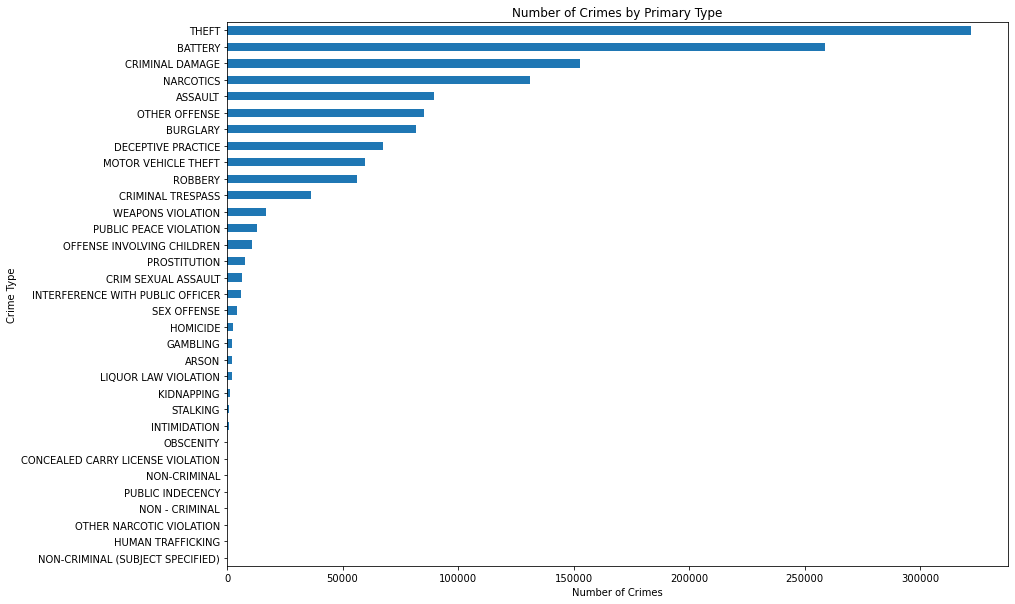

In [128]:
plt.figure(figsize=(14,10))
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.show()

## Seprating Crimes that are in Low Numbers

In [129]:
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes.rename(columns={"Block": "Amount"}, inplace=True)
all_classes = all_classes.sort_values(['Amount'], ascending=[False])
df.loc[df['Primary Type'].isin(all_classes.tail(13)['Primary Type']), 'Primary Type'] = 'OTHERS'
all_classes.tail(13)

,Primary Type,Amount
0,ARSON,2175
15,LIQUOR LAW VIOLATION,1928
14,KIDNAPPING,1075
30,STALKING,774
13,INTIMIDATION,643
21,OBSCENITY,169
4,CONCEALED CARRY LICENSE VIOLATION,84
19,NON-CRIMINAL,80
26,PUBLIC INDECENCY,61
18,NON - CRIMINAL,38


## Plot of Major Crimes

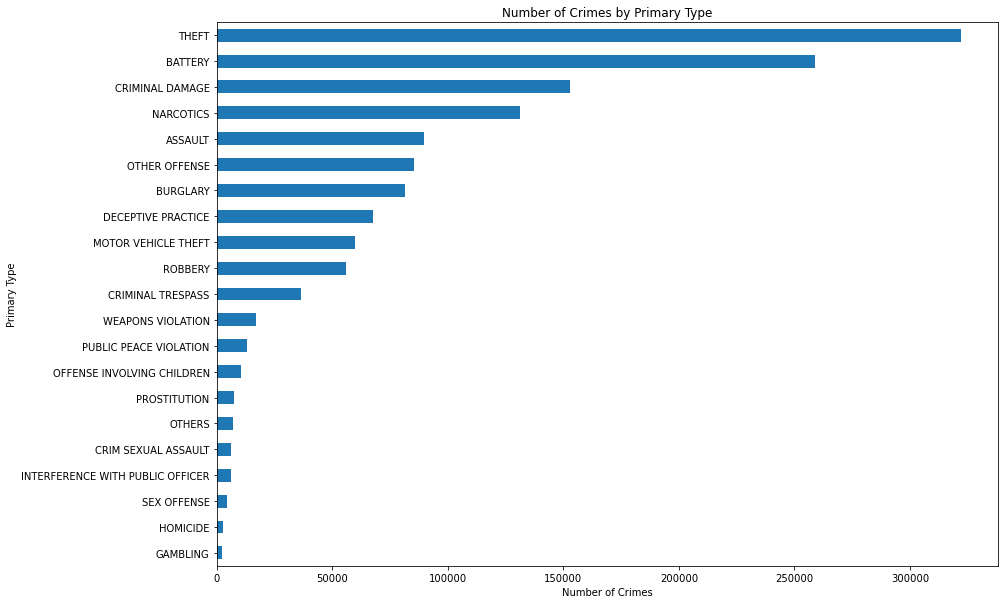

In [130]:
plt.figure(figsize=(14,10))
plt.title('Number of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

# 4. Exploratory Data Analysis

## Making separate DataFrames for Each Year

In [131]:
df.index = pd.to_datetime(df.index)
crimes_2012 = df[df['Year'] == 2012]
crimes_2013 = df[df['Year'] == 2013]
crimes_2014 = df[df['Year'] == 2014]
crimes_2015 = df[df['Year'] == 2015]
crimes_2016 = df[df['Year'] == 2016]
crimes_2017 = df[df['Year'] == 2017]

## Arrest Plots

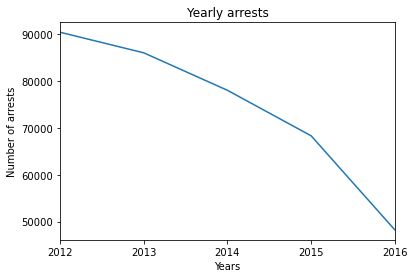

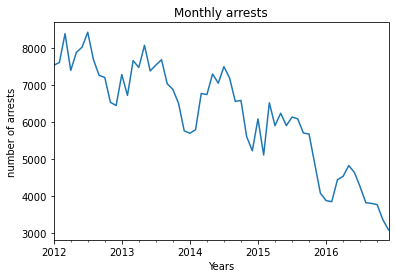

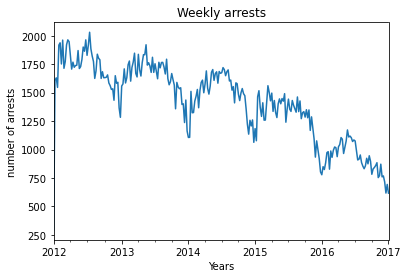

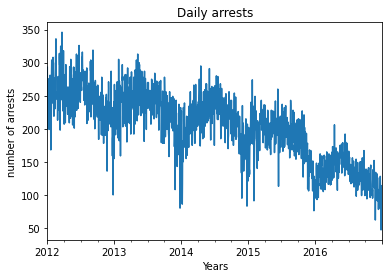

In [132]:
figsize=(6, 15)
plt.subplot()

# yearly arrest
y_count = df[df['Arrest'] == True]['Arrest'].resample('A').sum()
y_count.plot()
plt.title('Yearly arrests')
plt.xlabel('Years')
plt.ylabel('Number of arrests')
plt.show()

# Monthly arrest
m_count = df[df['Arrest'] == True]['Arrest'].resample('M').sum()
m_count.plot()
plt.title('Monthly arrests')
plt.xlabel('Years')
plt.ylabel('number of arrests')
plt.show()

# Weekly arrest
w_count = df[df['Arrest'] == True]['Arrest'].resample('W').sum()
w_count.plot()
plt.title('Weekly arrests')
plt.xlabel('Years')
plt.ylabel('number of arrests')
plt.show()

# daily arrest
d_count = df[df['Arrest'] == True]['Arrest'].resample('D').sum()
d_count.plot()
plt.title('Daily arrests')
plt.xlabel('Years')
plt.ylabel('number of arrests')
plt.show()
plt.show()

## Domestic Violence Plots

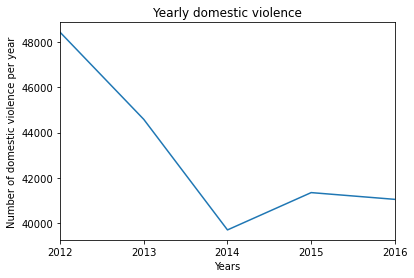

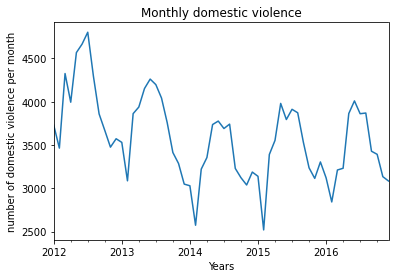

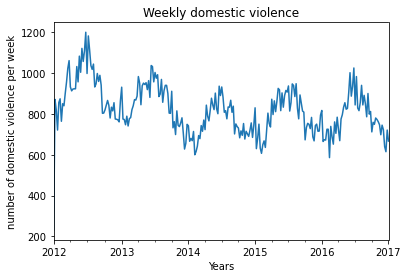

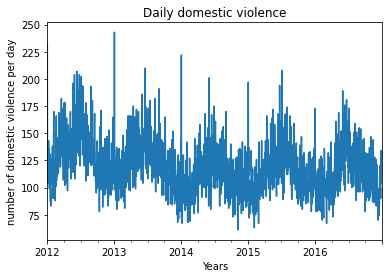

In [133]:
figsize=(6, 15)
plt.subplot()

# yearly domestic violence
y_count = df[df['Domestic'] == True]['Domestic'].resample('A').sum()
y_count.plot()
plt.xlabel('Years')
plt.ylabel('Number of domestic violence per year')
plt.title('Yearly domestic violence')
plt.show()

# Monthly domestic violence
m_count = df[df['Domestic'] == True]['Domestic'].resample('M').sum()
m_count.plot()
plt.title('Monthly domestic violence')
plt.xlabel('Years')
plt.ylabel('number of domestic violence per month')
plt.show()

# Weekly domestic violence
w_count = df[df['Domestic'] == True]['Domestic'].resample('W').sum()
w_count.plot()
plt.title('Weekly domestic violence')
plt.xlabel('Years')
plt.ylabel('number of domestic violence per week')
plt.show()

# daily domestic violence
d_count = df[df['Domestic'] == True]['Domestic'].resample('D').sum()
d_count.plot()
plt.xlabel('Years')
plt.ylabel('number of domestic violence per day')
plt.title('Daily domestic violence')
plt.show()
plt.show()

In [134]:
c12 = crimes_2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])
theft_2012 = pd.DataFrame(crimes_2012[c12]['Primary Type'])
c13 = crimes_2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])
theft_2013 = pd.DataFrame(crimes_2013[c13]['Primary Type'])
c14 = crimes_2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])
theft_2014 = pd.DataFrame(crimes_2014[c14]['Primary Type'])
c15 = crimes_2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])
theft_2015 = pd.DataFrame(crimes_2015[c15]['Primary Type'])
c16 = crimes_2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])
theft_2016 = pd.DataFrame(crimes_2016[c16]['Primary Type'])

In [135]:
grp = [pd.Grouper(freq ='M'), 'Primary Type']
grouper = theft_2012.groupby(grp)
grouper_2013 = theft_2013.groupby(grp)
grouper_2014 = theft_2014.groupby(grp)
grouper_2015 = theft_2015.groupby(grp)
grouper_2016 = theft_2016.groupby(grp)

In [136]:
data_2012 = grouper['Primary Type'].count().unstack()
data_2013 = grouper_2013['Primary Type'].count().unstack()
data_2014 = grouper_2014['Primary Type'].count().unstack()
data_2015 = grouper_2015['Primary Type'].count().unstack()
data_2016 = grouper_2016['Primary Type'].count().unstack()

## Monthly Top 5 Crimes Across 5 Years

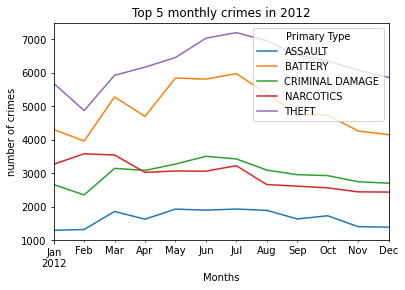

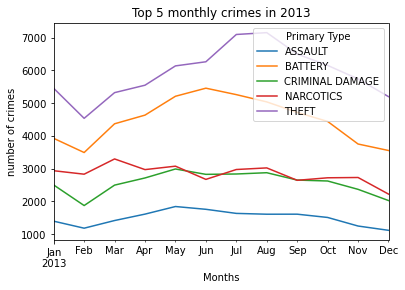

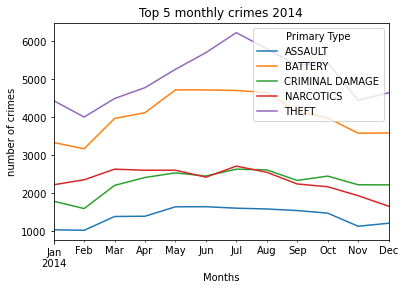

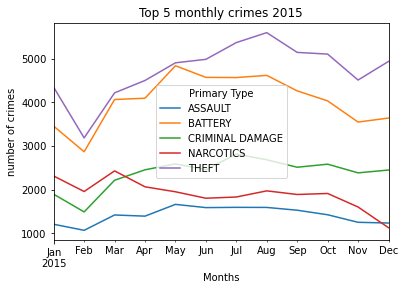

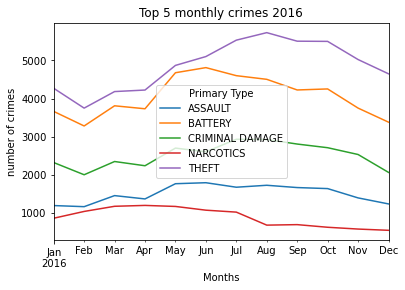

In [137]:
data_2012.plot()
plt.title("Top 5 monthly crimes in 2012")
plt.xlabel('Months')
plt.ylabel('number of crimes')
plt.show()

data_2013.plot()
plt.title("Top 5 monthly crimes in 2013")
plt.xlabel('Months')
plt.ylabel('number of crimes')
plt.show()

data_2014.plot()
plt.title("Top 5 monthly crimes 2014")
plt.xlabel('Months')
plt.ylabel('number of crimes')
plt.show()

data_2015.plot()
plt.title("Top 5 monthly crimes 2015")
plt.xlabel('Months')
plt.ylabel('number of crimes')
plt.show()

data_2016.plot()
plt.title("Top 5 monthly crimes 2016")
plt.xlabel('Months')
plt.ylabel('number of crimes')
plt.show()

In [138]:
data_ead = df[df.Year != 2017].drop(["IUCR", "Beat",  "District", "Ward",  "Year", "Community Area", "X Coordinate", "Y Coordinate", "Latitude", "Longitude", "Location", "FBI Code",], axis=1,)

## Number of cases and their Location

In [139]:
aux = pd.DataFrame(data_ead.resample("M").size(), columns=["Number of cases"])
aux["Year"] = pd.DataFrame(data_ead.resample("M").size(), columns=["Number of cases"]).index.year.astype(str)
aux["Month"] = pd.DataFrame(data_ead.resample("M").size(), columns=["Number of cases"]).index.month.astype(str)
aux["Year-Month"] = aux["Year"].str.cat(aux["Month"].str.zfill(2), sep="-")


## Number of cases per Year in every Month by using Heatmap

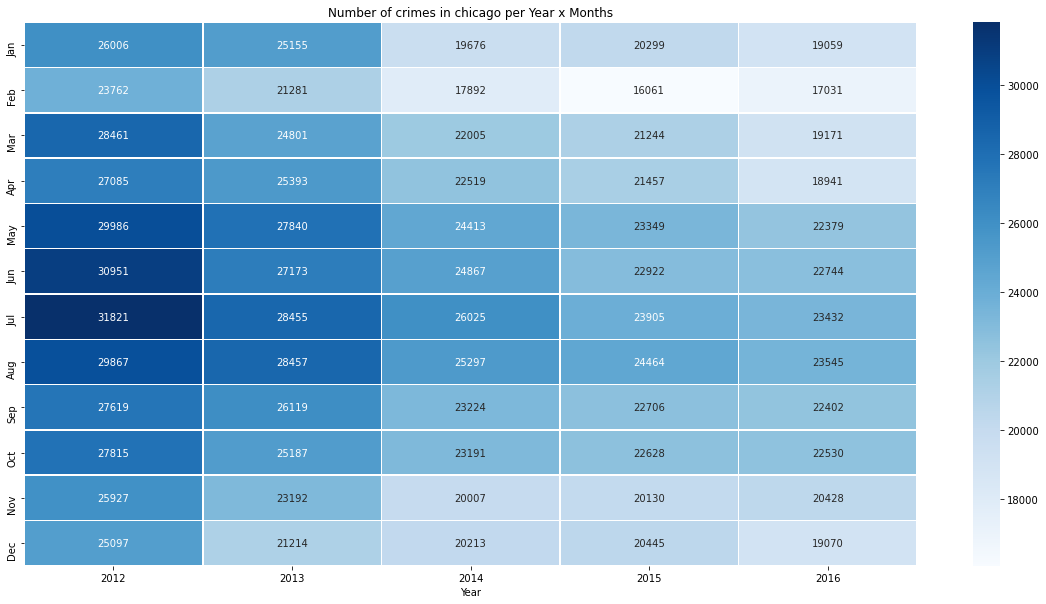

In [140]:
aux_csm = aux[["Month", "Year", "Number of cases"]]
aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)
aux_csm.index = aux_csm.index.astype(int)
aux_csm = aux_csm.sort_index()
aux_csm.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    aux_csm,
    fmt="d",
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    
).set_title('Number of crimes in chicago per Year x Months')

In [141]:
map_marks = df[['Latitude', 'Longitude']]
a = df.loc[:, 'Year']
map_marks['Year'] =  a #df['Year']
map_marks = map_marks.dropna()
# map_marks.head()

<ipython-input-141-6ec253fe050b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Map plot
#### There is crime everywhere in Chicago. In the centre, you can see less points

## Arrested rate per crime
#### The “VIOLATION” crimes look strongly correlated to the arrested rate

In [142]:
aux = data_ead.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4)*100
aux.sort_values('Arrest', inplace=True)

fig = px.bar(aux, orientation='h', x="Arrest (%)", y="Primary Type", text="Arrest (%)", height=800,)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")
fig.show()

## Visualization of  Arrested and Not Arrested

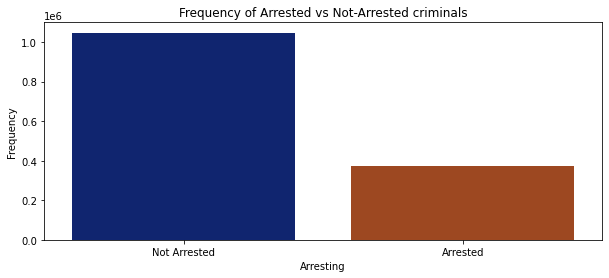

In [143]:
Arrest = data_ead["Arrest"]
MostCommonCA = Counter(Arrest).most_common()
x,y = zip(*MostCommonCA)
x,y = list(x),list(y)
x[1], x[0] = "Arrested", "Not Arrested" 

plt.figure(figsize=(10,4))
plt.title('Frequency of Arrested vs Not-Arrested criminals')
sns.barplot(x = x , y = y , palette = "dark")
plt.xlabel("Arresting")
plt.ylabel("Frequency")
plt.show()

In [144]:
Crimes = original_df.iloc[:, 3: ]
Crimes.index = pd.to_datetime(Crimes.index)
loct = Crimes['Location Description'].isin(['APARTMENT','RESIDENCE', 'STREET', 'SIDEWALK','OTHER','ALLEY','RESTAURANT','GAS STATION'])
Crimes2 = pd.DataFrame(Crimes[loct])

## Number of Crimes by Location
#### Street crimes are most common in Chicago

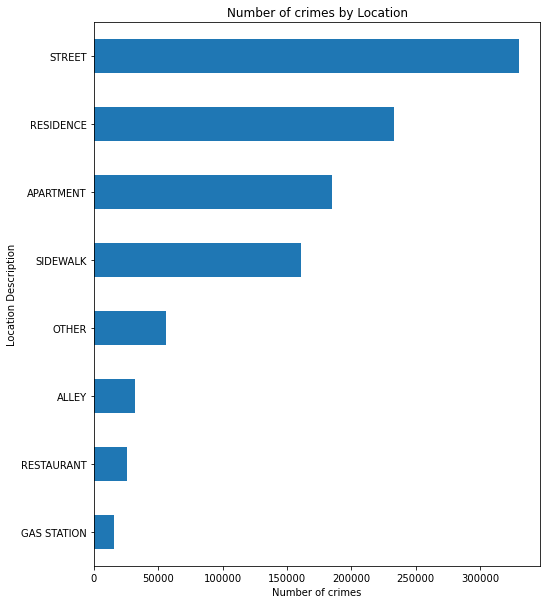

In [145]:
plt.figure(figsize=(8,10))
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
Crimes2.groupby([Crimes2['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.show()

## Map plot of Crimes
There is a crime almost everywhere in Chicago

In [146]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(title_text="Latitude and Longitude values from 2016 in Chicago.")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()